In [1]:
#1 
import json
import calendar
import random 
from datetime import date, timedelta

import faker
import numpy as  np
from pandas import DataFrame
from delorean import parse
import pandas as pd

#make the graphs nicer
pd.set_option('display.mpl_style','default')

#import matplotlib.pyplot as plt
#import matplotlib
#matplotlib.style.use('ggplot')

/Users/JORGEURIBESOLORZANO/virtualenvs/envjupyter/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
#2
fake = faker.Faker()


In [3]:
#3
usernames = set()
usernames_no =  1000
#usernames_no =  1000
#populate the set with 1000 unique user names
while len(usernames) < usernames_no:
    usernames.add(fake.user_name())
   

In [4]:
#4
def get_random_name_and_gender():
    skew = .6 # 60% of users will be female
    male = random.random() > skew
    if male:
        return fake.name_male(), 'M'
    else:
        return fake.name_female(), 'F'

def get_users( usernames):
    users = []
    for username in usernames:
        name, gender = get_random_name_and_gender()

        user = {
            'username': username,
            'name': name,
            'gender': gender,
            'email': fake.email(),
            'age': fake.random_int( min = 18,max = 90),
            'address': fake.address(),
        }
        users.append( json.dumps( user))
    return users

users = get_users( usernames)
users[: 2]


['{"username": "paguilar", "name": "Tony Garcia", "gender": "M", "email": "davidlopez@hotmail.com", "age": 85, "address": "67043 Roberts Via\\nWest Drewtown, MH 10617"}',
 '{"username": "sjohnson", "name": "Devin Hamilton", "gender": "M", "email": "douglasmurphy@burnett.com", "age": 42, "address": "537 Emily Passage Apt. 694\\nAnnaland, NM 34606-9609"}']

In [5]:
#5 
# Campaign name format 
# 
#InternalType_StartDate_EndDate_TargetAge_TargetGender_Currency

def get_type():
    #just some giberrish internal codes 
    types = ['AKX', 'BYU', 'GRZ', 'KTR']
    return random.choice(types)

def get_start_end_dates():
    duration = random.randint(1, 2 * 365)
    offset = random.randint(-365 , 365)
    start = date.today() - timedelta(days=offset)
    end = start + timedelta(days=duration)
    
    def _format_date(date_):
        return date_.strftime("%Y%m%d")
    
    return _format_date(start), _format_date(end)

def get_age():
    age = random.randint(20, 45)
    age -= age % 5 
    diff = random.randint(5, 25)
    diff -= diff % 5 
    return '{}-{}'.format(age, age + diff)

def get_gender():
    return random.choice(('M', 'F', 'B'))

def get_currency(): 
    return random.choice(('GPB', 'EUR', 'USD'))

def get_campaign_name():
    separator = '_'
    type_ = get_type()
    start_end = separator.join(get_start_end_dates())
    age = get_age()
    gender = get_gender()
    currency = get_currency()
    return separator.join((type_, start_end, age, gender, currency))
    

In [6]:
#6 

def get_campaign_data(): 
    name = get_campaign_name() 
    budget = random.randint( 10** 3, 10** 6) 
    spent = random.randint( 10** 2, budget) 
    clicks = int( random.triangular( 10** 2, 10** 5, 0.2 * 10** 5)) 
    impressions = int( random.gauss( 0.5 * 10** 6, 2)) 
    return { 
        'cmp_name': name, 
        'cmp_bgt': budget, 
        'cmp_spent': spent, 
        'cmp_clicks': clicks, 
        'cmp_impr': impressions }


In [7]:
#7

def get_data( users): 
    data = [] 
    for user in users: 
        campaigns = [get_campaign_data() for _ in range( random.randint( 2, 8))] 
        data.append({'user': user, 'campaigns': campaigns}) 
    return data



In [8]:
#8 
rough_data = get_data(users)
rough_data[:2]  # let's get a peek

[{'campaigns': [{'cmp_bgt': 546714,
    'cmp_clicks': 52209,
    'cmp_impr': 499999,
    'cmp_name': 'AKX_20180328_20190528_25-50_B_USD',
    'cmp_spent': 221163},
   {'cmp_bgt': 213972,
    'cmp_clicks': 34976,
    'cmp_impr': 499999,
    'cmp_name': 'BYU_20160625_20170523_40-50_B_EUR',
    'cmp_spent': 63676},
   {'cmp_bgt': 642255,
    'cmp_clicks': 30353,
    'cmp_impr': 499999,
    'cmp_name': 'KTR_20170730_20190624_20-40_F_USD',
    'cmp_spent': 449485},
   {'cmp_bgt': 819860,
    'cmp_clicks': 28315,
    'cmp_impr': 499999,
    'cmp_name': 'AKX_20170701_20171103_30-45_M_USD',
    'cmp_spent': 668660},
   {'cmp_bgt': 107919,
    'cmp_clicks': 16597,
    'cmp_impr': 500003,
    'cmp_name': 'AKX_20180130_20190327_40-55_B_EUR',
    'cmp_spent': 45944},
   {'cmp_bgt': 202175,
    'cmp_clicks': 43021,
    'cmp_impr': 500001,
    'cmp_name': 'GRZ_20161104_20170610_25-45_F_USD',
    'cmp_spent': 61737}],
  'user': '{"username": "paguilar", "name": "Tony Garcia", "gender": "M", "email": 

In [9]:
#9 
''''''
data = []
for datum in rough_data :
    for campaign in datum['campaigns']:
        campaign.update({'user' : datum['user']})
        data.append(campaign)
    data[:2] # let's take another peek
''''''
data = [] 
for datum in rough_data: 
    for campaign in datum['campaigns']: 
        campaign.update({'user': datum['user']}) 
        data.append(campaign)
    #print(*data, sep='\n')
    #data[:] # let's take another peek


In [10]:
#10 

df = DataFrame(data) 
df.head()


,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user
0,546714,52209,499999,AKX_20180328_20190528_25-50_B_USD,221163,"{""username"": ""paguilar"", ""name"": ""Tony Garcia""..."
1,213972,34976,499999,BYU_20160625_20170523_40-50_B_EUR,63676,"{""username"": ""paguilar"", ""name"": ""Tony Garcia""..."
2,642255,30353,499999,KTR_20170730_20190624_20-40_F_USD,449485,"{""username"": ""paguilar"", ""name"": ""Tony Garcia""..."
3,819860,28315,499999,AKX_20170701_20171103_30-45_M_USD,668660,"{""username"": ""paguilar"", ""name"": ""Tony Garcia""..."
4,107919,16597,500003,AKX_20180130_20190327_40-55_B_EUR,45944,"{""username"": ""paguilar"", ""name"": ""Tony Garcia""..."


In [11]:
#11 

df.count()


cmp_bgt       5140
cmp_clicks    5140
cmp_impr      5140
cmp_name      5140
cmp_spent     5140
user          5140
dtype: int64

In [12]:
#12 

df.describe()


,cmp_bgt,cmp_clicks,cmp_impr,cmp_spent
count,5140.000000,5140.000000,5140.000000,5140.000000
mean,502921.330739,40013.371012,499999.462646,250539.945525
std,289499.424930,21659.248189,1.999700,220792.461895
min,1033.000000,843.000000,499992.000000,104.000000
25%,253279.500000,22585.750000,499998.000000,65631.500000
50%,499129.500000,36775.000000,499999.000000,190689.000000
75%,757225.000000,55515.500000,500001.000000,384330.500000
max,999876.000000,99618.000000,500006.000000,984319.000000


In [13]:
#13 

df.sort_index( by =['cmp_bgt'],ascending = False).head( 3)



/Users/JORGEURIBESOLORZANO/virtualenvs/envjupyter/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user
989,999876,35642,500000,KTR_20170320_20181206_35-40_B_EUR,848836,"{""username"": ""nicole51"", ""name"": ""Karen Forbes..."
967,999512,12637,500000,AKX_20161223_20171125_30-35_M_GPB,973817,"{""username"": ""mgonzalez"", ""name"": ""Heather Woo..."
1284,999229,18739,499999,AKX_20170108_20180710_40-45_F_USD,586838,"{""username"": ""xduarte"", ""name"": ""Angela Brown""..."


In [14]:
#14

df.sort_index( by =['cmp_bgt'],ascending = False).tail(3)


/Users/JORGEURIBESOLORZANO/virtualenvs/envjupyter/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user
203,1625,14233,500003,BYU_20170609_20181203_30-55_B_USD,107,"{""username"": ""jillian09"", ""name"": ""Deanna Harr..."
3126,1330,33343,500003,KTR_20160831_20180408_20-40_F_USD,1089,"{""username"": ""wmack"", ""name"": ""Jessica Johnson..."
2769,1033,39899,500003,BYU_20161222_20180108_40-45_B_EUR,712,"{""username"": ""flin"", ""name"": ""Sabrina Branch"",..."


In [15]:
#15 

def unpack_campaign_name(name): 
    # very optimistic method, assumes data in campaign name 
    # is always in good state 
    dayfirts=False
    yearfirst=True
    type_, start, end, age, gender, currency = name.split('_') 
    start = parse(start).date 
    end = parse(end).date 
    return type_, start, end, age, gender, currency 

campaign_data = df['cmp_name'].apply(unpack_campaign_name) 
campaign_cols = [ 'Type', 'Start', 'End', 'Age', 'Gender', 'Currency'] 
campaign_df = DataFrame(campaign_data.tolist(), columns = campaign_cols, index = df.index) 
campaign_df.head( 3)


,Type,Start,End,Age,Gender,Currency
0,AKX,2018-03-28,2019-05-28,25-50,B,USD
1,BYU,2016-06-25,2017-05-23,40-50,B,EUR
2,KTR,2017-07-30,2019-06-24,20-40,F,USD


In [16]:
#16

df = df.join(campaign_df)


In [17]:
#17

df[['cmp_name'] + campaign_cols].head(3)


,cmp_name,Type,Start,End,Age,Gender,Currency
0,AKX_20180328_20190528_25-50_B_USD,AKX,2018-03-28,2019-05-28,25-50,B,USD
1,BYU_20160625_20170523_40-50_B_EUR,BYU,2016-06-25,2017-05-23,40-50,B,EUR
2,KTR_20170730_20190624_20-40_F_USD,KTR,2017-07-30,2019-06-24,20-40,F,USD


In [18]:
#18 
def unpack_user_json(user): 
    # very optimistic as well, expects user objects 
    # to have all attributes 
    user = json.loads( user.strip()) 
    return [ 
        user['username'], 
        user['email'], 
        user['name'], 
        user['gender'],
        user['age'], 
        user['address'], 
    ] 

user_data = df['user'].apply(unpack_user_json) 
user_cols = [ 'username', 'email', 'name', 'gender', 'age', 'address'] 
user_df = DataFrame( user_data.tolist(), columns = user_cols, index = df.index)



In [19]:
#19 
df = df.join(user_df) 



In [20]:
#20 

df[['user'] + user_cols].head( 2)


,user,username,email,name,gender,age,address
0,"{""username"": ""paguilar"", ""name"": ""Tony Garcia""...",paguilar,davidlopez@hotmail.com,Tony Garcia,M,85,"67043 Roberts Via\nWest Drewtown, MH 10617"
1,"{""username"": ""paguilar"", ""name"": ""Tony Garcia""...",paguilar,davidlopez@hotmail.com,Tony Garcia,M,85,"67043 Roberts Via\nWest Drewtown, MH 10617"


In [21]:
#21 

better_columns = [ 
    'Budget', 'Clicks', 'Impressions', 
    'cmp_name', 'Spent', 'user', 'Type', 
    'Start', 'End', 'Target Age', 'Target Gender', 
    'Currency', 'Username', 'Email', 
    'Name', 'Gender', 'Age', 'Address', 
]

df.columns = better_columns



In [22]:
#22
def calculate_extra_columns(df): 
    # Click Through Rate 
    df['CTR'] = df['Clicks'] / df['Impressions'] 
    
    # Cost Per Click 
    df['CPC'] = df['Spent'] / df['Clicks'] 
    
    # Cost Per Impression 
    df['CPI'] = df['Spent'] / df['Impressions'] 
    
calculate_extra_columns(df)


In [23]:
#23 

df[['Spent', 'Clicks', 'Impressions', 'CTR', 'CPC', 'CPI']].head(3)



,Spent,Clicks,Impressions,CTR,CPC,CPI
0,221163,52209,499999,0.104418,4.236109,0.442327
1,63676,34976,499999,0.069952,1.820563,0.127352
2,449485,30353,499999,0.060706,14.808586,0.898972


In [24]:
#24

clicks = df['Clicks'][0] 
impressions = df['Impressions'][0]
spent = df['Spent'][0] 
CTR = df['CTR'][0] 
CPC = df['CPC'][0] 
CPI = df['CPI'][0] 

print('CTR:', CTR, clicks / impressions) 
print('CPC:', CPC, spent / clicks) 
print('CPI:', CPI, spent / impressions)


CTR: 0.104418208836 0.104418208836
CPC: 4.23610871689 4.23610871689
CPI: 0.442326884654 0.442326884654


In [25]:
#25 

def get_day_of_the_week(day): 
    number_to_day = dict(enumerate(calendar.day_name, 1)) 
    return number_to_day[day.isoweekday()] 

def get_duration(row): 
    return (row['End'] - row['Start']).days

df['Day of Week'] = df['Start'].apply(get_day_of_the_week) 
df['Duration'] = df.apply(get_duration, axis = 1)



In [26]:
#26 

df[['Start', 'End', 'Duration', 'Day of Week']].head(3)


,Start,End,Duration,Day of Week
0,2018-03-28,2019-05-28,426,Wednesday
1,2016-06-25,2017-05-23,332,Saturday
2,2017-07-30,2019-06-24,694,Sunday


In [27]:
#27 
final_columns = ['Type', 'Start', 'End', 'Duration', 
                 'Day of Week', 'Budget', 'Currency', 
                 'Clicks', 'Impressions', 'Spent', 
                 'CTR', 'CPC', 'CPI', 
                 'Target Age', 'Target Gender', 
                 'Username', 'Email', 'Name', 
                 'Gender', 'Age' 
                ] 

df = df[ final_columns]


In [28]:
#28 
df.to_csv('df.csv') 



In [29]:
#29 
df.to_json('df.json') 



In [30]:
#30 
df.to_excel('df.xls')

In [31]:
#31 
%matplotlib inline



In [32]:
#32 
#import pylab 
#pylab.rcParams.update({' font.family' : 'serif'})



In [33]:
#33
df.describe()



,Duration,Budget,Clicks,Impressions,Spent,CTR,CPC,CPI,Age
count,5140.000000,5140.000000,5140.000000,5140.000000,5140.000000,5140.000000,5140.000000,5140.000000,5140.000000
mean,365.651751,502921.330739,40013.371012,499999.462646,250539.945525,0.080027,10.108022,0.501080,53.026654
std,245.268081,289499.424930,21659.248189,1.999700,220792.461895,0.043319,19.206601,0.441585,20.949663
min,-295.000000,1033.000000,843.000000,499992.000000,104.000000,0.001686,0.003284,0.000208,18.000000
25%,176.000000,253279.500000,22585.750000,499998.000000,65631.500000,0.045171,1.761628,0.131263,35.000000
50%,363.000000,499129.500000,36775.000000,499999.000000,190689.000000,0.073550,5.248165,0.381377,53.000000
75%,556.000000,757225.000000,55515.500000,500001.000000,384330.500000,0.111031,11.446961,0.768663,71.000000
max,1057.000000,999876.000000,99618.000000,500006.000000,984319.000000,0.199236,524.148280,1.968638,90.000000


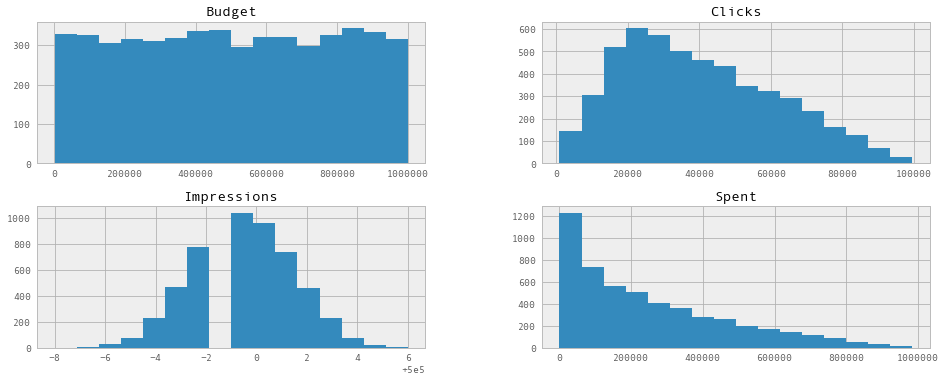

In [34]:
#34 
df[['Budget', 'Spent', 'Clicks', 'Impressions']]. hist( bins = 16, figsize =( 16, 6));
#df[['Budget', 'Spent', 'Clicks', 'Impressions']]. hist( bins = 16, figsize =( 16, 6))


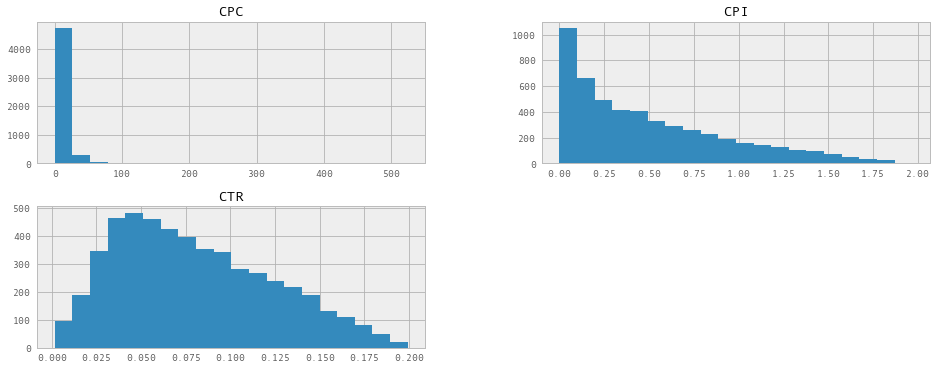

In [35]:
#35 
df[['CTR', 'CPC', 'CPI']]. hist( bins = 20, figsize =( 16, 6));


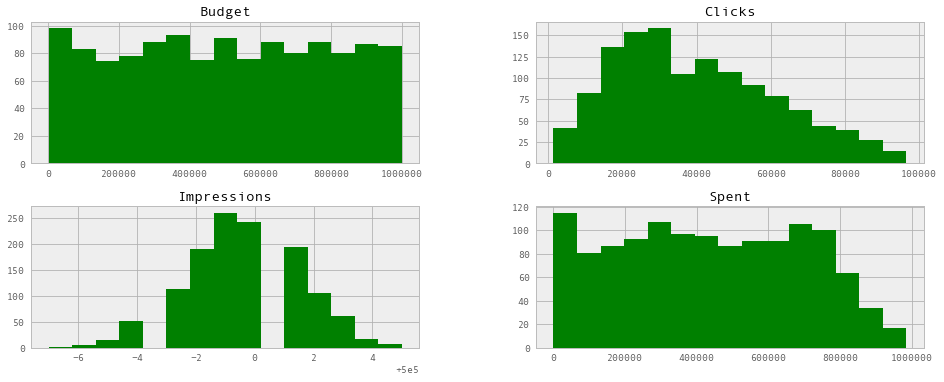

In [36]:
#36 
mask = (df.Spent > 0.75 * df.Budget) 
df[ mask][['Budget', 'Spent', 'Clicks', 'Impressions']].hist( bins = 15, figsize =( 16, 6), color ='g');


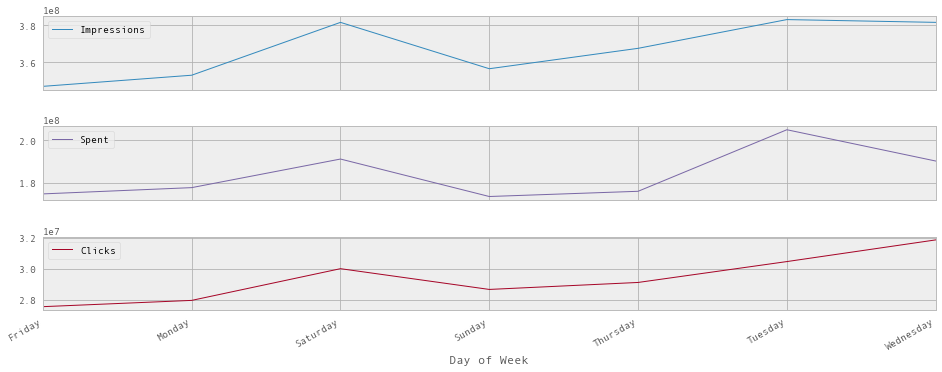

In [37]:
#37 
df_weekday = df.groupby(['Day of Week']). sum() 
df_weekday[['Impressions', 'Spent', 'Clicks']].plot( figsize =( 16, 6), subplots = True);


In [39]:
#38 
agg_config = { 
    'Impressions': { 
        'Mean Impr': 'mean', 
        'Std Impr': 'std', 
    }, 
    'Spent': ['mean', 'std'], 
}

df.groupby(['Target Gender', 'Target Age']).agg( agg_config)


Impressions             Spent               
                           Mean Impr  Std Impr    mean            std
Target Gender Target Age                                             
B             20-25           499999  1.910819  269615  232877.574852
              20-30           499999  1.749406  274731  253035.963414
              20-35           499999  1.683189  228244  213327.136164
              20-40           499999  2.196463  243189  243111.986878
              20-45           500000  2.042408  200072  234651.689497
              25-30           499999  1.767122  253320  205061.888897
              25-35           499999  2.052896  268958  226165.999943
              25-40           499999  2.056227  269647  233427.786913
              25-45           499999  1.977642  287623  242347.940841
              25-50           499999  1.476929  256408  231516.166034
              30-35           499999  2.049849  236469  200080.722350
              30-40           499999  2.294530  304264  254905.967565
              30-45           500000  1.803400  209868  187450.824349
              30-50           499999  1.829198  238090  219981.366370
              30-55           500000  3.036146  253927  251139.971263
              35-40           499999  1.798761  294949  251913.811753
              35-45           499999  2.006884  295288  217934.421602
              35-50           499999  2.180052  217763  189652.435086
              35-55           499999  1.973184  261849  228786.885824
              35-60           500000  1.812654  221850  185184.425622
              40-45           499999  2.036995  204280  179513.332483
              40-50           499999  2.059915  283691  227317.265079
              40-55           499999  2.136319  246802  219784.113987
              40-60           499999  1.895710  250639  210615.057313
              40-65           500000  1.887760  223996  150425.432796
              45-50           499998  2.016598  216652  168346.713544
              45-55           500000  2.199970  261224  246146.515153
              45-60           499999  1.450022  210487  176490.535381
              45-65           499999  2.656115  244877  231441.772848
              45-70           500000  2.065591  305775  283918.127074
...                              ...       ...     ...            ...
M             20-25           499999  2.071144  205117  189465.006115
              20-30           499999  2.055600  252475  247559.019882
              20-35           499999  2.044787  286146  214288.740894
              20-40           499999  2.171478  240497  215441.450234
              20-45           499999  2.201270  223406  199178.435522
              25-30           499999  2.148655  267431  208354.244356
              25-35           499999  1.828065  257344  209977.122254
              25-40           499999  2.047456  218000  212158.695728
              25-45           499999  2.119207  248452  232966.837207
              25-50           499999  1.812884  257014  242389.318129
              30-35           499999  2.056824  248330  221993.908088
              30-40           499999  2.076607  246017  236928.805387
              30-45           499999  2.029888  243318  210927.022195
              30-50           499999  1.979528  221508  198866.484431
              30-55           499999  1.943651  268720  224303.410438
              35-40           499999  1.902527  228853  213447.762392
              35-45           499999  2.142379  265682  231276.880721
              35-50           499999  1.996265  228637  224061.706675
              35-55           499999  1.869949  287426  233402.696578
              35-60           499998  1.589899  347804  224941.687224
              40-45           499999  1.773621  287412  242469.900012
              40-50           499999  2.124157  247544  189272.667316
              40-55           499998  2.079341  228058  202754.593751
              40-60           49999

In [40]:
#39 
pivot = df.pivot_table( values =['Impressions', 'Clicks', 'Spent'], 
                       index =['Target Age'], 
                       columns =['Target Gender'], 
                       aggfunc = np.sum ) 
pivot



Impressions                       Clicks                    \
Target Gender           B         F         M        B        F        M   
Target Age                                                                 
20-25            33999961  37999959  46999916  2597155  3170737  3680674   
20-30            31499969  39499974  34499954  2635294  3437681  2810246   
20-35            34999964  35499979  38999972  2621134  3107502  3155062   
20-40            40999990  39499976  43499961  3141941  2722028  3435820   
20-45             7500003  11499981   8499995   668530   830718   729509   
25-30            46499940  42999966  38999936  3778861  3368792  2962172   
25-35            43499935  30499986  34999973  3773018  2273398  2798532   
25-40            37999974  42499955  32999990  2981392  2936947  2448015   
25-45            35499933  45499947  42499957  2439571  3521225  3214151   
25-50             6999997   6499995   9499996   522525   616133   672857   
30-35            41499945  39999963  45499954  3514211  3502560  3769862   
30-40            38499946  43499976  46499912  2825855  3055565  3403944   
30-45            37500005  35999936  40999944  3124746  2520260  3462604   
30-50            37999964  32499963  41999936  3102334  2625760  3663105   
30-55             5500003   6499983   9499981   524216   522365   687493   
35-40            36499979  38499979  42499941  3317315  3312555  3830241   
35-45            36999969  34999938  35999967  2742725  2706358  3047898   
35-50            49999957  28499962  33999966  4082276  2304299  2689039   
35-55            45999962  36999938  33999959  3647788  3302796  2689839   
35-60             7500000   8999997   4499987   718264   771985   353099   
40-45            38999961  37999974  39499955  3151381  3184293  3229951   
40-50            43499936  43999933  42499962  3338250  3503301  3360190   
40-55            45499954  38499973  26499944  3716503  2923560  2022292   
40-60            44499956  36999928  39999954  3905155  2799999  3336322   
40-65             5500002   7999985  10999998   481035   611003   821567   
45-50             7999972  10000002   8499987   629510   853587   819876   
45-55             9000007  10499980   5499984   833124   822384   370873   
45-60             6499993   8499989   8499981   566109   537612   635430   
45-65             6999988   7499998   7000000   643068   593052   545043   
45-70             3000002   2499994   2000000   275221   145342   140717   

                  Spent                      
Target Gender         B         F         M  
Target Age                                   
20-25          18333860  17950255  19281006  
20-30          17308054  20943086  17420838  
20-35          15977113  17573347  22319440  
20-40          19941523  19189051  20923324  
20-45           3001086   5316020   3797917  
25-30          23558792  21593883  20859692  
25-35          23399386  18678599  18014107  
25-40          20493173  18726200  14388020  
25-45          20421264  22012071  21118446  
25-50           3589712   4179029   4883281  
30-35          19627000  20574146  22598036  
30-40          23428377  23941564  22879636  
30-45          15740157  18856981  19952123  
30-50          18094850  15993302  18606730  
30-55           2793203   3201289   5105683  
35-40          21531334  20168711  19452544  
35-45          21851349  16799693  19129144  
35-50          21776335  12744994  15547363  
35-55          24090151  18421039  19544988  
35-60           3327762   4540467   3130240  
40-45          15933855  18946022  22705611  
40-50          24681203  19257712  21041305  
40-55          22459033  21013793  12087107  
40-60          22306876  17415397  20545975  
40-65           2463961   3084080   4506468  
45-50           3466447   3976590   3268453  
45-55           4702043   5026096   3300415  
45-60           2736340   4746505   2611080  
45-65           3428280   4906724   4469185  
45-70           1834653   1076190